In [2]:
import numpy as np
import xarray as xr
import pandas as pd
from scipy import stats
from statistics import mode
import scipy.io as sio

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches

from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
import cartopy
import cartopy.crs as ccrs

# for shapefile
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline

In [4]:
reffile = 'data/latlon.nc'
lats = xr.open_dataset(reffile).XLAT_M.values[0:400,0:200]
lons = xr.open_dataset(reffile).XLONG_M.values[0:400,0:200]

def visualize_wUS_map(axes, indata, location=[False,False,False,False], title='', method='', method2='', ylim=[26,55],
                      hu2bdy_flag=False, state_flag=False, cmap='Blues', norm=False, vmin=-0.6, vmax=0.6):
    
    if norm==False:
        axes.pcolormesh(lons, lats, indata, cmap=cmap, vmin=vmin, vmax=vmax, zorder=3)
    else:
        axes.pcolormesh(lons, lats, indata, cmap=cmap, norm=norm, zorder=3)
    axes.set_xlim([-127, -110])
    axes.set_ylim(ylim)

    axes.add_feature(cartopy.feature.OCEAN, linewidth=0.5, facecolor='aliceblue', edgecolor='k', zorder=0)
    axes.add_feature(cartopy.feature.LAND, linewidth=0.5, facecolor='none', edgecolor='k', zorder=1)

    if state_flag==True:
        states = cartopy.feature.NaturalEarthFeature(category='cultural', scale='10m', edgecolor='black', linewidth=0.25,
                                                    facecolor='none', name='admin_1_states_provinces')
        axes.add_feature(states, zorder=4)


    countries = cartopy.feature.NaturalEarthFeature(category='cultural', scale='10m', edgecolor='black', linewidth=0.25,\
                                                    facecolor='none', name='admin_0_countries')
    axes.add_feature(countries, zorder=4)

    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='-', alpha=1, zorder=2)
    gl.xlabels_top = location[0]
    gl.xlabels_bottom = location[1]
    gl.ylabels_left = location[2]
    gl.ylabels_right = location[3]
    gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-180,-59,10))
    gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(0,81,5))
    gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
    gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
    
    
    axes.text(-108, 53, method2, horizontalalignment='center', size=13, zorder=4)
    axes.set_title(title, size=13)

## 1. load some demo data

In [5]:
demo_file = 'data/Sci_Social_demo-04.data.mat'

PAS_day_fraction = sio.loadmat(demo_file)['PAS_day_fraction'][0:400,0:200]
PAS_amount_fraction = sio.loadmat(demo_file)['PAS_amount_fraction'][0:400,0:200]

## 2. spatial map

In [6]:
#default_cmap = 'bwr_r'
default_cmap = 'viridis'

### 2.1 using default colormap

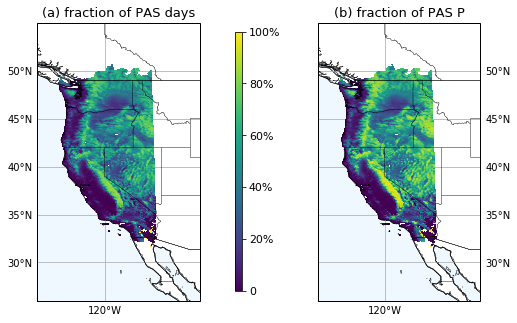

In [7]:
# two ways of calling default cmap
cmap = default_cmap
#cmap = matplotlib.cm.get_cmap(default_cmap)

fig1 = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((35,40), (0,0), rowspan=15, colspan=15, projection=ccrs.PlateCarree())
ax2 = plt.subplot2grid((35,40), (0,20), rowspan=15, colspan=15, projection=ccrs.PlateCarree())

visualize_wUS_map(ax1, PAS_day_fraction, title='(a) fraction of PAS days', location=[False, True, True, False],
                  cmap=cmap, vmin=0, vmax=1, state_flag=True)

visualize_wUS_map(ax2, PAS_amount_fraction, title='(b) fraction of PAS P', location=[False, True, False, True],
                  cmap=cmap, vmin=0, vmax=1, state_flag=True)

cbar_ax1 = fig1.add_axes([0.43, 0.57, 0.01, 0.3])
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=cmap,
                                       ticks=np.arange(0, 1.0001, 0.2), orientation='vertical')
cb1.set_ticklabels(['0', '20%', '40%', '60%', '80%','100%'])
cbar_ax1.tick_params(labelsize=11)

plt.show()
plt.close()
del(fig1)

### 2.1.1  now let's discretize it

In [11]:
N = 5
cmap = matplotlib.cm.get_cmap(default_cmap)
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap_dis_color = matplotlib.cm.jet.from_list('Custom cmap', cmaplist, N)
bounds = np.linspace(0,1,N+1)
#bounds = np.array([0, 0.1, 0.2, 0.3, 0.4, 1])
norm_dis_color = matplotlib.colors.BoundaryNorm(bounds, N)

The key element here is cmaplist, which is something you can tweak with (e.g., adding/removing/changing a specific color)

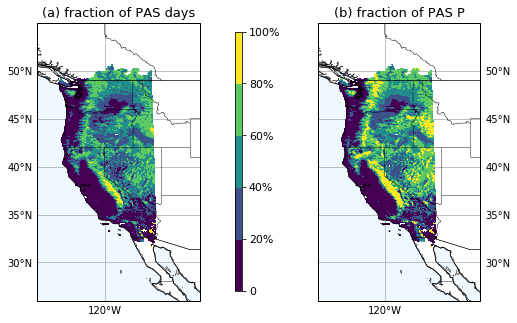

In [12]:
cmap = cmap_dis_color
norm = norm_dis_color

fig1 = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((35,40), (0,0), rowspan=15, colspan=15, projection=ccrs.PlateCarree())
ax2 = plt.subplot2grid((35,40), (0,20), rowspan=15, colspan=15, projection=ccrs.PlateCarree())

visualize_wUS_map(ax1, PAS_day_fraction, title='(a) fraction of PAS days', location=[False, True, True, False],
                  cmap=cmap, norm=norm, state_flag=True)

visualize_wUS_map(ax2, PAS_amount_fraction, title='(b) fraction of PAS P', location=[False, True, False, True],
                  cmap=cmap, norm=norm, state_flag=True)

cbar_ax1 = fig1.add_axes([0.43, 0.57, 0.01, 0.3])
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=cmap, #norm=norm,
                                       ticks=np.arange(0, 1.0001, 0.2), orientation='vertical')
cb1.set_ticklabels(['0', '20%', '40%', '60%', '80%','100%'])
cbar_ax1.tick_params(labelsize=11)

plt.show()
plt.close()
del(fig1)

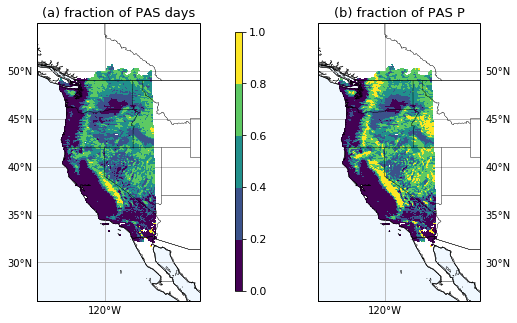

In [13]:
cmap = cmap_dis_color
norm = norm_dis_color

fig1 = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((35,40), (0,0), rowspan=15, colspan=15, projection=ccrs.PlateCarree())
ax2 = plt.subplot2grid((35,40), (0,20), rowspan=15, colspan=15, projection=ccrs.PlateCarree())

visualize_wUS_map(ax1, PAS_day_fraction, title='(a) fraction of PAS days', location=[False, True, True, False],
                  cmap=cmap, norm=norm, state_flag=True)

visualize_wUS_map(ax2, PAS_amount_fraction, title='(b) fraction of PAS P', location=[False, True, False, True],
                  cmap=cmap, norm=norm, state_flag=True)

cbar_ax1 = fig1.add_axes([0.43, 0.57, 0.01, 0.3])
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=cmap, norm=norm,
                                       ticks=np.arange(0, 1.0001, 0.2), orientation='vertical')
#cb1.set_ticklabels(['0', '20%', '40%', '60%', '80%','100%'])
cbar_ax1.tick_params(labelsize=11)

plt.show()
plt.close()
del(fig1)

### 2.2 customized colormap

### 2.2.1  definition from built-in color names

In [14]:
N=3
# the following 3 methods are equivalent
# built-in names
cmaplist = ['cornsilk','lightseagreen', 'royalblue']
# RGB values (range: 0 - 1)
cmaplist = [(255/255, 248/255, 220/255), (32/255, 178/255, 170/255), (65/255, 105/255, 225/255)]
# hex values
cmaplist = ['#fff8dc', '#20b2aa', '#4169e1']
cmap_3color = matplotlib.cm.jet.from_list('Custom cmap', cmaplist, N)
bounds = np.linspace(0,1,N+1)
#bounds = np.array([0, 0.1, 0.2, 1])
norm_3color = matplotlib.colors.BoundaryNorm(bounds, N)

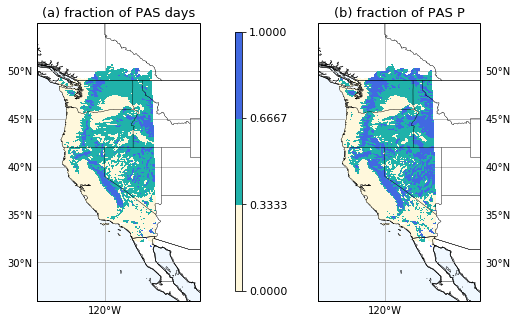

In [15]:
cmap = cmap_3color
norm = norm_3color

fig1 = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((35,40), (0,0), rowspan=15, colspan=15, projection=ccrs.PlateCarree())
ax2 = plt.subplot2grid((35,40), (0,20), rowspan=15, colspan=15, projection=ccrs.PlateCarree())

visualize_wUS_map(ax1, PAS_day_fraction, title='(a) fraction of PAS days', location=[False, True, True, False],
                  cmap=cmap, norm=norm, state_flag=True)

visualize_wUS_map(ax2, PAS_amount_fraction, title='(b) fraction of PAS P', location=[False, True, False, True],
                  cmap=cmap, norm=norm, state_flag=True)

cbar_ax1 = fig1.add_axes([0.43, 0.57, 0.01, 0.3])
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=cmap, #norm=norm,
                                       ticks=np.arange(0, 1.000, 0.333333), orientation='vertical')
#cb1.set_ticklabels(['0', '10%', '20%', '100%'])
cbar_ax1.tick_params(labelsize=11)

plt.show()
plt.close()
del(fig1)

In [16]:
def crt_MeteoSwiss_colormap(cmapname):
    
    full_info = {'hotcold':['#181870', '#104e8b', '#1774cd', '#4876ff', '#5baced', '#add7e6', '#d1eded', '#e5eff9', '#f2ffff', '#ffffff', '#fdf5e6', '#ffe4b4', '#f3a460', '#ed7600', '#cd661d', '#e0310f', '#ed0000', '#cd0000', '#8b0000'],
                 'hotcolr':['#000032', '#181870', '#104e8b', '#1774cd', '#4876ff', '#5baced', '#add7e6', '#d1eded', '#e5eff9', '#f2ffff', '#fdf5e6', '#ffe4b4', '#f3a460', '#ed7600', '#cd661d', '#e0310f', '#ed0000', '#cd0000', '#8b0000', '#320000'],
                 'mch':['#ffffff', '#000000', '#202020', '#404040', '#606060', '#808080', '#a0a0a0', '#c0c0c0', '#e0e0e0', '#ff0000', '#00ff00', '#0000ff', '#ffff00', '#00ffff', '#ff00ff'],
                 'perc2':['#d7e3ee', '#b5caff', '#8fb3ff', '#7f97ff', '#abcf63', '#e8f59e', '#fffa14', '#ffd121', '#ffa30a', '#ff4c00'],
                 'percent':['#640096', '#2730d7', '#598dfc', '#8befd9', '#60cf91', '#1a9850', '#91cf60', '#d9ef8b', '#fee08b', '#fc8d59', '#d73027', '#960064'],
                 'precip1':['#ffffff', '#edfac2', '#cdffcd', '#99f0b2', '#53bd9f', '#32a696', '#3296b4', '#0570b0', '#05508c', '#0a1f96', '#2c0246', '#6a2c5a'],
                 'precip2_15':['#ffffff', '#640064', '#af00af', '#dc00dc', '#3232c8', '#0064ff', '#009696', '#00c832', '#64ff00', '#96ff00', '#c8ff32', '#ffff00', '#ffc800', '#ffa000', '#ff7d00', '#e11900'],
                 'precip2_17':['#ffffff', '#ebf6ff', '#d6e2ff', '#b5c9ff', '#8eb2ff', '#7f96ff', '#7285f8', '#6370f8', '#009e1e', '#3cbc3d', '#b3d16e', '#b9f96e', '#fff913', '#ffa309', '#e50000', '#bd0000', '#810000', '#000000'],
                 'precip3':['#ffffff', '#d6e2ff', '#b5c9ff', '#8eb2ff', '#7f96ff', '#6370f7', '#0063ff', '#009696', '#00c633', '#63ff00', '#96ff00', '#c6ff33', '#ffff00', '#ffc600', '#ffa000', '#ff7c00', '#ff1900'],
                 'precip4':['#fefefe', '#dffff9', '#9ad9ca', '#67c2a3', '#40ad75', '#32a696', '#5aa0cd', '#4292c7', '#4c8dc4', '#072f6b', '#071e46', '#4c0073'],
                 'precip4_diff':['#6b2107', '#b53b21', '#c75542', '#cd695a', '#a63237', '#ad4058', '#c26772', '#d99a9f', '#ffdfe0', '#fefefe', '#fefefe', '#dffff9', '#9ad9ca', '#67c2a3', '#40ad75', '#32a696', '#5aa0cd', '#4292c7', '#4c8dc4', '#072f6b'],
                 'precip1_diff_12':['#b66a28', '#cd853f', '#e1a564', '#f5cd84', '#f5e09e', '#fff5ba', '#ffffff', '#cdffcd', '#99f0b2', '#53bd9f', '#6eaac8', '#0570b0', '#023858'],
                 'precip1_diff_1':['#53bd9f', '#e1a564'],
                 'spread':['#ffffff', '#ffe1e1', '#ffd2d2', '#ffa5a5', '#ff7878', '#ff4b4b', '#ff0000', '#ff6400', '#ff9600', '#ffc800', '#ffff00', '#8cff00', '#00ff00', '#00cd5f', '#0091c8', '#0000ff'],
                 'sunshine':['#ffffff', '#fff5cc', '#ffe670', '#ffcc33', '#ffaf33', '#ff9933', '#ff6f33', '#ff5500', '#e6281e', '#c81e14'],
                 'sunshine_diff':['#510979', '#950fdf', '#b74bf3', '#cb7ef6', '#e1b4fa', '#ecd0fc', '#ffffff', '#fff5cc', '#ffe670', '#ffcc33', '#ffaf33', '#ff6f00', '#e6281e'],
                 't2m':['#6de3ff', '#aff0ff', '#ffc4e2', '#ff99cc', '#ff00ff', '#800080', '#000080', '#4646ff', '#3366ff', '#85a2ff', '#ffffff', '#cccccc', '#b3b3b3', '#999999', '#606060', '#808000', '#005c00', '#008000', '#339966', '#9dd500', '#d4ff5b', '#ffff00', '#ffb870', '#ff9900', '#ff6600', '#ff0000', '#bc4b00', '#ab0038', '#800000', '#a370ff'],
                 'temp':['#071e46', '#072f6b', '#08529c', '#2171b5', '#4292c7', '#5aa0cd', '#78bfd6', '#aadce6', '#dbf5ff', '#f0fcff', '#fff0f5', '#ffe0e0', '#fcbbaa', '#fc9272', '#fb6a4a', '#f03c2b', '#cc181e', '#a60f14', '#780a0f', '#5f0000'],
                 'temp_diff_18':['#071e46', '#072f6b', '#08579c', '#2171b5', '#4292c7', '#5aa0cd', '#78bfd6', '#aadce6', '#dbf5ff', '#ffffff', '#ffe0e0', '#fcbbaa', '#fc9272', '#fb6a4a', '#f03c2b', '#cc181e', '#a60f14', '#780a0f', '#5f0000'],
                 'temp_diff_1':['#f03c2b', '#2171b5'],
                 'topo':['#28369a', '#00c932', '#1ed368', '#5ee074', '#a2eb82', '#dff892', '#f6e595', '#c8b276', '#a27e5e', '#8f6154', '#a27d74', '#b2968b', '#c7b0aa', '#dbcdca', '#ece4e2', '#ffffff'],
                 'wind':['#ffffff', '#eff4d1', '#e8f49e', '#aace63', '#e2ed16', '#ffed00', '#ffed82', '#f4d17f', '#eda549', '#e58c3d', '#db7c3d', '#ef073d', '#e856a3', '#9b70a8', '#6370f7', '#7f96ff', '#8eb2ff', '#b5c9ff'],
                 'demo':'Here is a list of the colormaps:\n  hotcold\n  hotcolr\n  mch\n  perc2\n  percent\n  precip1\n  precip2_15\n  precip2_17\n  precip3\n  precip4\n  precip4_diff\n  precip_diff_12\n  precip_diff_1\n  spread\n  sunshine\n  sunshine_diff\n  t2m\n  temp\n  temp_diff_18\n  temp_diff_1\n  topo\n  wind',
                }
    if cmapname=='demo':
        print(full_info.get('demo'))
    else:
        return matplotlib.colors.ListedColormap(full_info.get(cmapname))

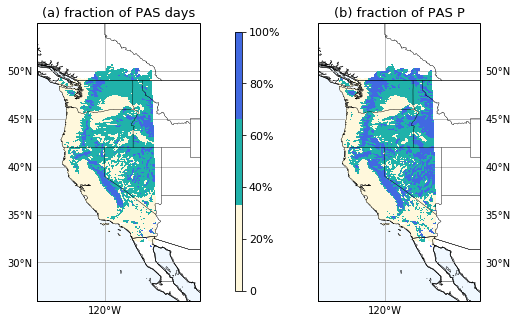

In [17]:
cmap = cmap_3color
norm = norm_3color

fig1 = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((35,40), (0,0), rowspan=15, colspan=15, projection=ccrs.PlateCarree())
ax2 = plt.subplot2grid((35,40), (0,20), rowspan=15, colspan=15, projection=ccrs.PlateCarree())

visualize_wUS_map(ax1, PAS_day_fraction, title='(a) fraction of PAS days', location=[False, True, True, False],
                  cmap=cmap, norm=norm, state_flag=True)

visualize_wUS_map(ax2, PAS_amount_fraction, title='(b) fraction of PAS P', location=[False, True, False, True],
                  cmap=cmap, norm=norm, state_flag=True)

cbar_ax1 = fig1.add_axes([0.43, 0.57, 0.01, 0.3])
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=cmap, #norm=norm,
                                       ticks=np.arange(0, 1.0001, 0.2), orientation='vertical')
cb1.set_ticklabels(['0', '20%', '40%', '60%', '80%','100%'])
cbar_ax1.tick_params(labelsize=11)

plt.show()
plt.close()
del(fig1)

## 3. NCL colormaps

In [18]:
import colormath, colormath.color_objects, colormath.color_conversions
from colormath.color_objects import sRGBColor

import urllib
import re

In [19]:
color_obj_dict = {'sRGB':colormath.color_objects.sRGBColor,
                  'HSV':colormath.color_objects.HSVColor,
                  'Lab':colormath.color_objects.LabColor,
                  'LCHuv':colormath.color_objects.LCHuvColor,
                  'LCHab':colormath.color_objects.LCHabColor,
                  'XYZ':colormath.color_objects.XYZColor}

def __rgb_to_array(rgb_color):
    r = np.minimum(1, round(rgb_color.rgb_r*10000)/10000)
    g = np.minimum(1, round(rgb_color.rgb_g*10000)/10000)
    b = np.minimum(1, round(rgb_color.rgb_b*10000)/10000)
    return r,g,b


def create_palette(start_rgb, end_rgb, n, colorspace):
    # convert start and end to a point in the given colorspace
    start = colormath.color_conversions.convert_color(start_rgb, colorspace).get_value_tuple()
    end = colormath.color_conversions.convert_color(end_rgb, colorspace).get_value_tuple()

    # create a set of n points along start to end
    points = list(zip(*[np.linspace(start[i], end[i], n) for i in range(3)]))

    # create a color for each point and convert back to rgb
    rgb_colors = [colormath.color_conversions.convert_color(colorspace(*point), sRGBColor) for point in points]

    # finally convert rgb colors back to hex
    return [__rgb_to_array(color) for color in  rgb_colors]


def __retrive_NCL_webcontent(cmapname):
    target_url = 'https://www.ncl.ucar.edu/Document/Graphics/ColorTables/Files/%s.rgb' % cmapname
    request = urllib.request.urlopen(target_url)
    return request


def __collect_discrete_NCL_cmap(cmapname):
    rawdata = __retrive_NCL_webcontent(cmapname)
    
    cmap_color_list = list()
    
    color_section_sig = 0
    
    for line in rawdata:
        
        line_decode = line.decode('utf-8')
        info = re.split('\s+', line_decode.replace('\n','').replace('^\s+',''))
        if color_section_sig==1:
            if info[0]=='' and len(info)>=3:
                if np.maximum(np.maximum(float(info[1]), float(info[2])), float(info[3]))>1:
                    cmap_color_list.append((float(info[1])/255, float(info[2])/255, float(info[3])/255))
                else:
                    cmap_color_list.append((float(info[1]), float(info[2]), float(info[3])))
            if len(info)==3:
                if ';' in info[0] or '#' in info[0]:
                    whatisthis = 's'
                else:
                    
                    if np.maximum(np.maximum(float(info[0]), float(info[1])), float(info[2]))>1:
                        cmap_color_list.append((float(info[0])/255, float(info[1])/255, float(info[2])/255))
                    else:
                        cmap_color_list.append((float(info[0]), float(info[1]), float(info[2])))
        
        if 'ncolors' in str(info[0]):
            color_section_sig = 1  # meaning now we are at color lines (or "r g b" line)

    return cmap_color_list



def __cmap_refinement(raw_cmap_rgb, n_interpolate=10, workspace=color_obj_dict['sRGB']):
    # workspace:  choose which color space the refinement is conducted.
    #             refer to https://stackoverflow.com/questions/55032648/given-a-start-color-and-a-middle-color-how-to-get-the-remaining-colors-python
    
    n_in = len(raw_cmap_rgb)

    new_array = list()

    for i in np.arange(n_in-1):
        out_colors = create_palette(sRGBColor(*raw_cmap_rgb[i], is_upscaled=False), sRGBColor(*raw_cmap_rgb[i+1], is_upscaled=False), n_interpolate+1, workspace)
        for j in np.arange(len(out_colors)-1):
            new_array.append(out_colors[j])
            
    return new_array


def generate_NCL_cmap(cmapname, cont_opt=False, cont_param_n=10, cont_param_ws='sRGB',
                      white_first=False, white_ext=False, reverse_cmap=False):
    # description:
    #     cmapname:      taken as shown on the NCL website
    #     cont_opt:      to convert the discreate colormap to continuous colormap
    #     cont_param_n:  how many "intermediate" colors to be inserted to the nearby discreate colors
    #     cont_param_ws: color space to conduct interploation. Default to "sRGB", which should work for most cases
    #     white_first:   whether to set the first color as white. May be useful if the minimum does not mean anything
    
    cmap_discrete_raw = __collect_discrete_NCL_cmap(cmapname)
    
    if reverse_cmap==True:
        cmap_discrete_raw.reverse()
    
    if white_first==True:
        if white_ext==True:
            cmap_discrete = list()
            cmap_discrete.append((1,1,1))
            for i in np.arange(len(cmap_discrete_raw)):
                cmap_discrete.append(cmap_discrete_raw[int(i)])
        else:
            cmap_discrete = cmap_discrete_raw.copy()
        cmap_discrete[0] = (1,1,1)
    else:
        cmap_discrete = cmap_discrete_raw
    
    if cont_opt==False:
        out_cmap = cmap_discrete
        
    if cont_opt==True:
        out_cmap = __cmap_refinement(cmap_discrete, n_interpolate=cont_param_n, workspace=color_obj_dict[cont_param_ws])
        
    return matplotlib.colors.ListedColormap(out_cmap)#, out_cmap

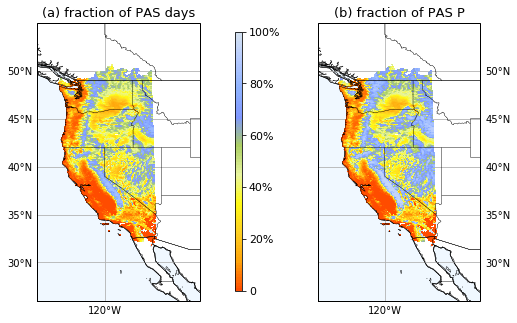

In [20]:
cmap = generate_NCL_cmap('perc2_9lev', cont_opt=True, reverse_cmap=True)

fig1 = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((35,40), (0,0), rowspan=15, colspan=15, projection=ccrs.PlateCarree())
ax2 = plt.subplot2grid((35,40), (0,20), rowspan=15, colspan=15, projection=ccrs.PlateCarree())

visualize_wUS_map(ax1, PAS_day_fraction, title='(a) fraction of PAS days', location=[False, True, True, False],
                  cmap=cmap, vmin=0, vmax=1, state_flag=True)

visualize_wUS_map(ax2, PAS_amount_fraction, title='(b) fraction of PAS P', location=[False, True, False, True],
                  cmap=cmap, vmin=0, vmax=1, state_flag=True)

cbar_ax1 = fig1.add_axes([0.43, 0.57, 0.01, 0.3])
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=cmap,
                                       ticks=np.arange(0, 1.0001, 0.2), orientation='vertical')
cb1.set_ticklabels(['0', '20%', '40%', '60%', '80%','100%'])
cbar_ax1.tick_params(labelsize=11)

plt.show()
plt.close()
del(fig1)

### 3.1  comparing different color space

In [27]:
cmap_raw = generate_NCL_cmap('perc2_9lev')
cmap_HSV = generate_NCL_cmap('perc2_9lev', cont_opt=True, cont_param_ws='HSV')
cmap_sRGB = generate_NCL_cmap('perc2_9lev', cont_opt=True, cont_param_ws='sRGB')
cmap_Lab = generate_NCL_cmap('perc2_9lev', cont_opt=True, cont_param_ws='Lab')
cmap_LCHuv = generate_NCL_cmap('perc2_9lev', cont_opt=True, cont_param_ws='LCHuv')
cmap_LCHab = generate_NCL_cmap('perc2_9lev', cont_opt=True, cont_param_ws='LCHab')
cmap_XYZ = generate_NCL_cmap('perc2_9lev', cont_opt=True, cont_param_ws='XYZ')

cmaps = [cmap_raw, cmap_HSV, cmap_sRGB, cmap_Lab, cmap_LCHuv, cmap_LCHab, cmap_XYZ]

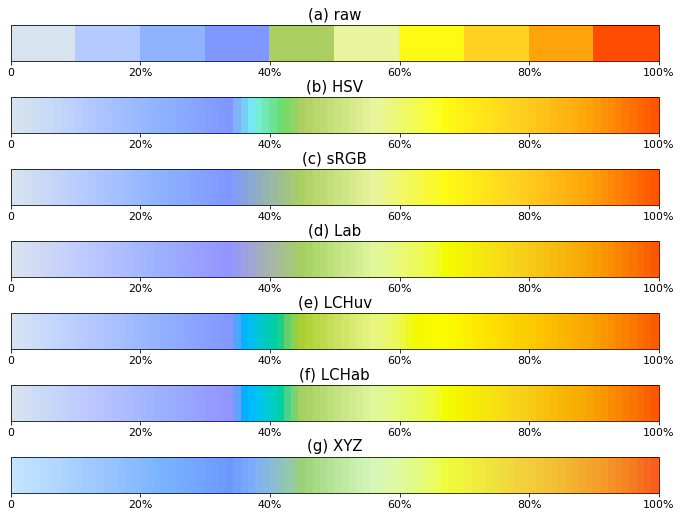

In [29]:
fig1 = plt.figure(figsize=(15,10))

cbar_ax0 = fig1.add_axes([0.2, 0.9, 0.6, 0.05])
cbar_ax1 = fig1.add_axes([0.2, 0.8, 0.6, 0.05])
cbar_ax2 = fig1.add_axes([0.2, 0.7, 0.6, 0.05])
cbar_ax3 = fig1.add_axes([0.2, 0.6, 0.6, 0.05])
cbar_ax4 = fig1.add_axes([0.2, 0.5, 0.6, 0.05])
cbar_ax5 = fig1.add_axes([0.2, 0.4, 0.6, 0.05])
cbar_ax6 = fig1.add_axes([0.2, 0.3, 0.6, 0.05])

cbar_axes = [cbar_ax0, cbar_ax1, cbar_ax2, cbar_ax3, cbar_ax4, cbar_ax5, cbar_ax6]
titles = ['(a) raw', '(b) HSV', '(c) sRGB', '(d) Lab', '(e) LCHuv', '(f) LCHab', '(g) XYZ']

for i in np.arange(7):
    axis = cbar_axes[i]
    cbx = matplotlib.colorbar.ColorbarBase(axis, cmap=cmaps[i],
                                       ticks=np.arange(0, 1.0001, 0.2), orientation='horizontal')
    cbx.set_ticklabels(['0', '20%', '40%', '60%', '80%','100%'])
    axis.tick_params(labelsize=11)
    axis.set_title(titles[i], size=15)

plt.show()
plt.close()
del(fig1)